In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

You should consider upgrading via the 'c:\users\ushaa\anaconda3\envs\pythondata\python.exe -m pip install --upgrade pip' command.


In [2]:
# install joblib. This will be used to save the model. 
# Restart the kernel after installing 
!pip install joblib

You should consider upgrading via the 'c:\users\ushaa\anaconda3\envs\pythondata\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Data Exploration

In [5]:
df.groupby('koi_disposition').count()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_disposition,,,,,,,,,,,,,,,,,,,,,
CANDIDATE,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687,...,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687
CONFIRMED,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,...,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800
FALSE POSITIVE,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,...,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504


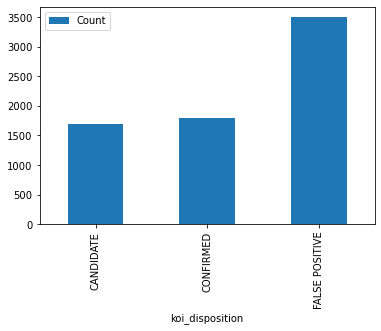

In [6]:
grouped_df = df[['koi_disposition','koi_fpflag_nt']].groupby('koi_disposition').count()
grouped_df = grouped_df.rename(columns={"koi_fpflag_nt":"Count"})
grouped_df.plot(kind="bar")

# Selecting all 40 features (columns)

In [7]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [8]:
# Set features. This will also be used as x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]
selected_features

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


### Create a Train Test Split

Use `koi_disposition` for the y values

In [9]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['koi_disposition']]

print("Shape: ", X.shape, y.shape)

Shape:  (6991, 40) (6991, 1)


In [10]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
encoded_y

C:\Users\ushaa\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 2, 2, ..., 0, 2, 2])

In [11]:
encoded_y = encoded_y.reshape(-1, 1)

In [12]:
for label, original_class in zip(encoded_y, y.values.reshape(-1,1)):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: 

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Ori

------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
---

Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Clas

Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE

------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Origina

Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
-----------

Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------


Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class:

Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encod

Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FA

Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded La

In [13]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

In [14]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


In [15]:
y_train.shape

(5243, 1)

### Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

### Train the Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=200)
model2 = model2.fit(X_train_scaled, y_train.flatten())

In [18]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8975972540045767


### Feature Importance

In [19]:
feature_names = selected_features.columns
sorted(zip(model2.feature_importances_, feature_names), reverse=True)

[(0.11037938017980162, 'koi_fpflag_co'),
 (0.09969161470387432, 'koi_fpflag_nt'),
 (0.06215055576441115, 'koi_fpflag_ss'),
 (0.05480207794970305, 'koi_model_snr'),
 (0.04860179294791915, 'koi_prad'),
 (0.039784758163741586, 'koi_prad_err1'),
 (0.035262024955095346, 'koi_duration_err1'),
 (0.034908964117533754, 'koi_fpflag_ec'),
 (0.033392059251114874, 'koi_duration_err2'),
 (0.030875681355539805, 'koi_steff_err2'),
 (0.030586205142015536, 'koi_steff_err1'),
 (0.027859756224055496, 'koi_prad_err2'),
 (0.023016398139446358, 'koi_time0bk_err2'),
 (0.02227056686156891, 'koi_time0bk_err1'),
 (0.022077944360653537, 'koi_period'),
 (0.02198057126805715, 'koi_depth'),
 (0.021594890023462456, 'koi_duration'),
 (0.018843743204606776, 'koi_impact'),
 (0.018570462114429875, 'koi_insol_err1'),
 (0.018187773401942126, 'koi_period_err2'),
 (0.017230265913705755, 'koi_period_err1'),
 (0.014928700929712506, 'koi_teq'),
 (0.014453166192082407, 'koi_depth_err1'),
 (0.013739838022272261, 'koi_insol'),
 (0

### Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [20]:
model2.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [21]:
# Create the GridSearchCV model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'criterion': ['gini','entropy'],
              'class_weight': [{0:1, 1:1, 2:2}, "balanced","balanced_subsample", None],
              'max_features': ['auto','sqrt','log2',None],
             }
grid2 = GridSearchCV(model2, param_grid, verbose=3)

In [22]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train.flatten())

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100, score=0.901, total=   1.3s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100, score=0.905, total=   1.2s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100, score=0.883, total=   1.3s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100, score=0.871, total=   1.3s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100, score=0.876, total=   1.3s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=200, score=0.903, total=   2.7s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=200, score=0.899, total=   2.5s
[CV] class_weight={0: 1, 1: 1, 2: 2}, cri

[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=400, score=0.886, total=   5.1s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=400, score=0.878, total=   5.0s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=400, score=0.880, total=   5.2s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=500, score=0.903, total=   6.4s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=500, score=0.904, total=   6.2s
[CV] class_weight={0: 1, 1: 1, 2: 2}, cri

[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=200, score=0.898, total=  16.8s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=200 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=200, score=0.892, total=  14.7s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=200 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=200, score=0.891, total=  14.6s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=300, score=0.912, total=  25.3s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=300, score=0.898, total=  22.9s
[CV] class_weight={0: 1, 1: 1, 2: 2}, cri

[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500, score=0.909, total=  10.5s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500, score=0.888, total=  10.2s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500, score=0.881, total=  10.3s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500, score=0.876, total=  10.2s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.905, total=   2.2s
[CV] class_wei

[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=200, score=0.880, total=   3.5s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300, score=0.904, total=   5.0s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300, score=0.905, total=   5.0s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300, score=0.882, total=   5.0s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300, score=0.875, total=   4.8s
[CV] class_wei

[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=None, n_estimators=500, score=0.896, total=  47.0s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=None, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=None, n_estimators=500, score=0.894, total=  41.8s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=None, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=None, n_estimators=500, score=0.886, total=  44.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, score=0.903, total=   1.2s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, score=0.900, total=   1.3s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_e

[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400, score=0.906, total=   8.4s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400, score=0.908, total=   5.3s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400, score=0.889, total=   5.3s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400, score=0.881, total=   5.2s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400, score=0.882, total=   5.5s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=500 
[CV]  class_weight=balanced, criterion=gini, max_f

[CV]  class_weight=balanced, criterion=gini, max_features=None, n_estimators=200, score=0.888, total=  15.4s
[CV] class_weight=balanced, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_features=None, n_estimators=300, score=0.909, total=  22.4s
[CV] class_weight=balanced, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_features=None, n_estimators=300, score=0.904, total=  21.5s
[CV] class_weight=balanced, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_features=None, n_estimators=300, score=0.890, total=  23.4s
[CV] class_weight=balanced, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_features=None, n_estimators=300, score=0.893, total=  21.0s
[CV] class_weight=balanced, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_f

[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.888, total=   1.8s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.883, total=   1.9s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.886, total=   1.8s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.908, total=   3.9s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.901, total=   3.8s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=b

[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=400, score=0.879, total=   6.5s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500, score=0.906, total=   8.3s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500, score=0.906, total=   8.0s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500, score=0.884, total=   8.4s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500, score=0.878, total=   8.2s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=b

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300, score=0.901, total=   4.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300, score=0.883, total=   4.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300, score=0.885, total=   4.1s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300, score=0.888, total=   4.1s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=400, score=0.904, total=   5.8s
[CV] class_weight=balanced_subsample, cri

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, score=0.900, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, score=0.880, total=   1.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, score=0.878, total=   1.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, score=0.882, total=   1.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, score=0.903, total=   2.9s
[CV] class_weight=balanced_subsample, cri

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400, score=0.900, total=  29.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400, score=0.891, total=  29.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400, score=0.888, total=  28.0s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400, score=0.885, total=  28.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=500 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=500, score=0.911, total=  38.1s
[CV] class_weight=balanced_subsample, cri

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.908, total=   4.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.908, total=   4.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.887, total=   3.9s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.876, total=   4.0s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.885, total=   4.0s
[CV] class_wei

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=400, score=0.876, total=   6.9s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=400, score=0.879, total=   7.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500, score=0.904, total=   9.1s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500, score=0.904, total=   8.8s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500, score=0.884, total=   9.0s
[CV] class_wei

[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=200, score=0.881, total=   2.5s
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=200, score=0.878, total=   2.6s
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=300, score=0.900, total=   3.8s
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=300, score=0.904, total=   3.7s
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=300, score=0.888, total=   4.0s
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=300, score=0.880,

[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=100, score=0.880, total=   1.1s
[CV] class_weight=None, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=200, score=0.898, total=   2.2s
[CV] class_weight=None, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=200, score=0.906, total=   2.1s
[CV] class_weight=None, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=200, score=0.884, total=   2.3s
[CV] class_weight=None, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=200, score=0.878, total=   2.1s
[CV] class_weight=None, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=200, score=0.883,

[CV]  class_weight=None, criterion=entropy, max_features=auto, n_estimators=100, score=0.906, total=   1.8s
[CV] class_weight=None, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=auto, n_estimators=100, score=0.904, total=   1.8s
[CV] class_weight=None, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=auto, n_estimators=100, score=0.888, total=   1.9s
[CV] class_weight=None, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=auto, n_estimators=100, score=0.880, total=   1.8s
[CV] class_weight=None, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=auto, n_estimators=100, score=0.885, total=   2.0s
[CV] class_weight=None, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=None, criterion=entropy, max_features=aut

[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=400, score=0.884, total=   7.4s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500, score=0.905, total=   9.5s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500, score=0.904, total=   9.2s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500, score=0.887, total=   9.3s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500, score=0.883, total=   9.2s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_features=sqr

[CV]  class_weight=None, criterion=entropy, max_features=None, n_estimators=300, score=0.891, total=  27.1s
[CV] class_weight=None, criterion=entropy, max_features=None, n_estimators=300 
[CV]  class_weight=None, criterion=entropy, max_features=None, n_estimators=300, score=0.891, total=  27.5s
[CV] class_weight=None, criterion=entropy, max_features=None, n_estimators=400 
[CV]  class_weight=None, criterion=entropy, max_features=None, n_estimators=400, score=0.917, total=  39.5s
[CV] class_weight=None, criterion=entropy, max_features=None, n_estimators=400 
[CV]  class_weight=None, criterion=entropy, max_features=None, n_estimators=400, score=0.903, total=  36.6s
[CV] class_weight=None, criterion=entropy, max_features=None, n_estimators=400 
[CV]  class_weight=None, criterion=entropy, max_features=None, n_estimators=400, score=0.897, total=  37.9s
[CV] class_weight=None, criterion=entropy, max_features=None, n_estimators=400 
[CV]  class_weight=None, criterion=entropy, max_features=Non

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 132.3min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'class_weight': [{0: 1, 1: 1, 2: 2}, 'balanced',
                                          'balanced_subsample', None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [23]:
print(grid2.best_params_)
print(grid2.best_score_)

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': None, 'n_estimators': 200}
0.9002448715243162


In [24]:
# Make predictions with the hypertuned model
predictions = grid2.predict(X_test_scaled)

In [25]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test.flatten(), predictions,
                            target_names=["CANDIDATE", "CONFIRMED","FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.83      0.80      0.82       411
     CONFIRMED       0.84      0.86      0.85       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.91      1748
     macro avg       0.89      0.88      0.89      1748
  weighted avg       0.91      0.91      0.91      1748



In [26]:
hypertuned_model = RandomForestClassifier(class_weight = 'balanced_subsample', criterion= 'entropy', max_features= None, n_estimators= 200)
hypertuned_model

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features=None, n_estimators=200)

In [27]:
hypertuned_model.fit(X_train_scaled, y_train.flatten())

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features=None, n_estimators=200)

In [28]:
print(f"Training Data Score: {hypertuned_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {hypertuned_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9067505720823799


# Feature Selection

### Choosing Top 17 features

In [29]:
# Set top 17 features. This will be used as x values.
top_17_features = df[[ 
'koi_fpflag_co',
'koi_fpflag_nt',
'koi_fpflag_ss',
'koi_model_snr',
'koi_prad',
'koi_prad_err1',
'koi_duration_err1',
'koi_fpflag_ec',
'koi_duration_err2',
'koi_steff_err2',
'koi_steff_err1',
'koi_prad_err2',
'koi_time0bk_err2',
'koi_time0bk_err1',
'koi_period',
'koi_depth',
'koi_duration',
]]

top_17_features

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad,koi_prad_err1,koi_duration_err1,koi_fpflag_ec,koi_duration_err2,koi_steff_err2,koi_steff_err1,koi_prad_err2,koi_time0bk_err2,koi_time0bk_err1,koi_period,koi_depth,koi_duration
0,0,0,0,25.8,2.83,0.32,0.11600,0,-0.11600,-81,81,-0.19,-0.003520,0.003520,54.418383,874.8,4.50700
1,0,0,1,76.3,14.60,3.92,0.03410,0,-0.03410,-176,158,-1.31,-0.000581,0.000581,19.899140,10829.0,1.78220
2,0,0,1,505.6,33.46,8.50,0.00537,0,-0.00537,-174,157,-2.83,-0.000115,0.000115,1.736952,8079.2,2.40641
3,0,0,0,40.9,2.75,0.88,0.04200,0,-0.04200,-211,169,-0.35,-0.001130,0.001130,2.525592,603.3,1.65450
4,0,0,0,40.2,2.77,0.90,0.06730,0,-0.06730,-232,189,-0.30,-0.001900,0.001900,4.134435,686.0,3.14020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,8.4,1.11,0.32,0.63400,1,-0.63400,-152,169,-0.23,-0.015700,0.015700,8.589871,87.7,4.80600
6987,1,0,1,453.3,29.35,7.70,0.01740,0,-0.01740,-166,139,-2.57,-0.000170,0.000170,0.527699,1579.2,3.22210
6988,0,0,0,10.6,0.72,0.24,0.22900,0,-0.22900,-220,165,-0.08,-0.007690,0.007690,1.739849,48.5,3.11400
6989,1,0,0,12.3,1.07,0.36,0.16200,0,-0.16200,-236,193,-0.11,-0.002850,0.002850,0.681402,103.6,0.86500


### Create Train Test Split with Top 17 features

In [30]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X_top17 = top_17_features
y_top17 = df[['koi_disposition']].values.reshape(-1, 1)

print("Shape: ", X_top17.shape, y_top17.shape)

Shape:  (6991, 17) (6991, 1)


In [31]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_top17.flatten())
encoded_y_top17 = label_encoder.transform(y_top17.flatten())
encoded_y_top17

array([1, 2, 2, ..., 0, 2, 2])

In [32]:
encoded_y_top17 = encoded_y_top17.reshape(-1, 1)
encoded_y_top17

array([[1],
       [2],
       [2],
       ...,
       [0],
       [2],
       [2]])

In [34]:
for label, original_class in zip(encoded_y_top17, y.values.reshape(-1,1)):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: 

------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
---

------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encoded Labe

------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
En

Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CONFIRMED']
Encoded Label: [1]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CONFIRMED']
Encod

------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]


------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
----------

Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['CANDIDATE']
Encoded Label: [0]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encoded Label: [2]
------------
Original Class: ['FALSE POSITIVE']
Encod

In [35]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train_top17, X_test_top17, y_train_top17, y_test_top17 = train_test_split(X_top17, encoded_y_top17, random_state=42)

### Pre-processing - Top 17 features data

In [36]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_minmax_top17 = MinMaxScaler().fit(X_train_top17)

X_train_scaled_top17 = X_minmax_top17.transform(X_train_top17)
X_test_scaled_top17 = X_minmax_top17.transform(X_test_top17)

### Train the Model with Top 17 Features

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_top17 = RandomForestClassifier(n_estimators=200)
model_top17 = model_top17.fit(X_train_scaled_top17, y_train_top17.flatten())

In [38]:
print(f"Training Data Score: {model_top17.score(X_train_scaled_top17, y_train_top17)}")
print(f"Testing Data Score: {model_top17.score(X_test_scaled_top17, y_test_top17)}")

Training Data Score: 0.9998092695021934
Testing Data Score: 0.902745995423341


### Hyperparameter Tuning on Top 17 Features

In [39]:
model_top17.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [40]:
# Create the GridSearchCV model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid_top17 = {'n_estimators': [100, 200, 300, 400, 500],
              'criterion': ['gini','entropy'],
              'class_weight': [{0:1, 1:1, 2:2}, "balanced","balanced_subsample", None],
              'max_features': ['auto','sqrt','log2',None],
             }
grid2_top17 = GridSearchCV(model_top17, param_grid_top17, verbose=3)

In [41]:
# Train the model with GridSearch
grid2_top17.fit(X_train_scaled_top17, y_train_top17.flatten())

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100, score=0.911, total=   0.7s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100, score=0.901, total=   0.7s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100, score=0.889, total=   0.7s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100, score=0.885, total=   0.7s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=100, score=0.884, total=   0.7s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=200, score=0.912, total=   1.3s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=auto, n_estimators=200, score=0.905, total=   1.3s
[CV] class_weight={0: 1, 1: 1, 2: 2}, cri

[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=400, score=0.892, total=   2.8s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=400, score=0.885, total=   2.8s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=400, score=0.880, total=   2.8s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=500, score=0.910, total=   3.5s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=sqrt, n_estimators=500, score=0.903, total=   3.5s
[CV] class_weight={0: 1, 1: 1, 2: 2}, cri

[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=200, score=0.886, total=   4.6s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=200 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=200, score=0.885, total=   4.3s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=200 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=200, score=0.880, total=   4.4s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=300, score=0.907, total=   6.8s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=gini, max_features=None, n_estimators=300, score=0.905, total=   6.7s
[CV] class_weight={0: 1, 1: 1, 2: 2}, cri

[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500, score=0.906, total=   5.1s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500, score=0.892, total=   5.1s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500, score=0.885, total=   4.9s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=auto, n_estimators=500, score=0.883, total=   5.0s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.908, total=   1.1s
[CV] class_wei

[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=200, score=0.881, total=   2.0s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300, score=0.908, total=   3.0s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300, score=0.906, total=   2.9s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300, score=0.893, total=   3.1s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=log2, n_estimators=300, score=0.880, total=   2.9s
[CV] class_wei

[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=None, n_estimators=500, score=0.885, total=  15.9s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=None, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=None, n_estimators=500, score=0.886, total=  15.2s
[CV] class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=None, n_estimators=500 
[CV]  class_weight={0: 1, 1: 1, 2: 2}, criterion=entropy, max_features=None, n_estimators=500, score=0.881, total=  15.5s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, score=0.909, total=   0.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight=balanced, criterion=gini, max_features=auto, n_estimators=100, score=0.902, total=   0.7s
[CV] class_weight=balanced, criterion=gini, max_features=auto, n_e

[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400, score=0.916, total=   2.8s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400, score=0.907, total=   2.8s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400, score=0.894, total=   2.7s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400, score=0.884, total=   2.7s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400 
[CV]  class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=400, score=0.883, total=   2.7s
[CV] class_weight=balanced, criterion=gini, max_features=sqrt, n_estimators=500 
[CV]  class_weight=balanced, criterion=gini, max_f

[CV]  class_weight=balanced, criterion=gini, max_features=None, n_estimators=200, score=0.881, total=   4.3s
[CV] class_weight=balanced, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_features=None, n_estimators=300, score=0.907, total=   6.7s
[CV] class_weight=balanced, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_features=None, n_estimators=300, score=0.897, total=   6.5s
[CV] class_weight=balanced, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_features=None, n_estimators=300, score=0.887, total=   6.8s
[CV] class_weight=balanced, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_features=None, n_estimators=300, score=0.892, total=   6.4s
[CV] class_weight=balanced, criterion=gini, max_features=None, n_estimators=300 
[CV]  class_weight=balanced, criterion=gini, max_f

[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.896, total=   1.0s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.884, total=   1.0s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=100 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=100, score=0.883, total=   1.0s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.915, total=   2.0s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.907, total=   2.0s
[CV] class_weight=balanced, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=b

[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=400, score=0.882, total=   4.1s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500, score=0.908, total=   5.1s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500, score=0.905, total=   5.0s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500, score=0.895, total=   5.1s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500, score=0.885, total=   5.0s
[CV] class_weight=balanced, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=b

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300, score=0.911, total=   2.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300, score=0.896, total=   2.4s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300, score=0.885, total=   2.3s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=300, score=0.884, total=   2.6s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=auto, n_estimators=400, score=0.916, total=   3.4s
[CV] class_weight=balanced_subsample, cri

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, score=0.903, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, score=0.896, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, score=0.882, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=100, score=0.884, total=   0.8s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=log2, n_estimators=200, score=0.911, total=   1.6s
[CV] class_weight=balanced_subsample, cri

[CV]  class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400, score=0.895, total=  10.7s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400, score=0.888, total=  10.0s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400, score=0.892, total=   9.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=400, score=0.880, total=   9.2s
[CV] class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=500 
[CV]  class_weight=balanced_subsample, criterion=gini, max_features=None, n_estimators=500, score=0.908, total=  11.8s
[CV] class_weight=balanced_subsample, cri

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.907, total=   2.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.904, total=   2.3s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.895, total=   2.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.884, total=   2.2s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=sqrt, n_estimators=200, score=0.885, total=   2.2s
[CV] class_wei

[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=400, score=0.883, total=   4.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=400 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=400, score=0.883, total=   4.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500, score=0.907, total=   5.7s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500, score=0.908, total=   5.5s
[CV] class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500 
[CV]  class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=500, score=0.891, total=   5.6s
[CV] class_wei

[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=200, score=0.886, total=   1.3s
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=200, score=0.880, total=   1.3s
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=300, score=0.913, total=   2.1s
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=300, score=0.908, total=   2.0s
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=300, score=0.894, total=   2.0s
[CV] class_weight=None, criterion=gini, max_features=auto, n_estimators=300 
[CV]  class_weight=None, criterion=gini, max_features=auto, n_estimators=300, score=0.885,

[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=100, score=0.885, total=   0.7s
[CV] class_weight=None, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=200, score=0.910, total=   1.4s
[CV] class_weight=None, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=200, score=0.906, total=   1.4s
[CV] class_weight=None, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=200, score=0.898, total=   1.3s
[CV] class_weight=None, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=200, score=0.887, total=   1.3s
[CV] class_weight=None, criterion=gini, max_features=log2, n_estimators=200 
[CV]  class_weight=None, criterion=gini, max_features=log2, n_estimators=200, score=0.885,

[CV]  class_weight=None, criterion=entropy, max_features=auto, n_estimators=100, score=0.906, total=   1.1s
[CV] class_weight=None, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=auto, n_estimators=100, score=0.892, total=   1.0s
[CV] class_weight=None, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=auto, n_estimators=100, score=0.889, total=   1.0s
[CV] class_weight=None, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=auto, n_estimators=100, score=0.880, total=   1.0s
[CV] class_weight=None, criterion=entropy, max_features=auto, n_estimators=100 
[CV]  class_weight=None, criterion=entropy, max_features=auto, n_estimators=100, score=0.880, total=   1.1s
[CV] class_weight=None, criterion=entropy, max_features=auto, n_estimators=200 
[CV]  class_weight=None, criterion=entropy, max_features=aut

[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=400, score=0.885, total=   4.0s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500, score=0.910, total=   5.0s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500, score=0.908, total=   5.0s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500, score=0.893, total=   5.0s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500, score=0.887, total=   4.9s
[CV] class_weight=None, criterion=entropy, max_features=sqrt, n_estimators=500 
[CV]  class_weight=None, criterion=entropy, max_features=sqr

[CV]  class_weight=None, criterion=entropy, max_features=None, n_estimators=300, score=0.892, total=   9.1s
[CV] class_weight=None, criterion=entropy, max_features=None, n_estimators=300 
[CV]  class_weight=None, criterion=entropy, max_features=None, n_estimators=300, score=0.881, total=   9.3s
[CV] class_weight=None, criterion=entropy, max_features=None, n_estimators=400 
[CV]  class_weight=None, criterion=entropy, max_features=None, n_estimators=400, score=0.909, total=  12.6s
[CV] class_weight=None, criterion=entropy, max_features=None, n_estimators=400 
[CV]  class_weight=None, criterion=entropy, max_features=None, n_estimators=400, score=0.900, total=  12.5s
[CV] class_weight=None, criterion=entropy, max_features=None, n_estimators=400 
[CV]  class_weight=None, criterion=entropy, max_features=None, n_estimators=400, score=0.884, total=  12.8s
[CV] class_weight=None, criterion=entropy, max_features=None, n_estimators=400 
[CV]  class_weight=None, criterion=entropy, max_features=Non

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 54.2min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'class_weight': [{0: 1, 1: 1, 2: 2}, 'balanced',
                                          'balanced_subsample', None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [42]:
print(grid2_top17.best_params_)
print(grid2_top17.best_score_)

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 300}
0.898335383025637


In [43]:
# Make predictions with the hypertuned model
predictions_top17 = grid2_top17.predict(X_test_scaled_top17)

In [44]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_top17.flatten(), predictions_top17,
                            target_names=["CANDIDATE", "CONFIRMED","FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.83      0.74      0.78       411
     CONFIRMED       0.80      0.86      0.83       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.90      1748
     macro avg       0.87      0.86      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



In [46]:
hypertuned_model_top17 = RandomForestClassifier(class_weight = 'balanced_subsample', criterion= 'gini', max_features= 'auto', n_estimators= 300)
hypertuned_model_top17

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=300)

In [47]:
hypertuned_model_top17.fit(X_train_scaled_top17, y_train_top17.flatten())

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=300)

In [48]:
print(f"Training Data Score: {hypertuned_model_top17.score(X_train_scaled_top17, y_train_top17)}")
print(f"Testing Data Score: {hypertuned_model_top17.score(X_test_scaled_top17, y_test_top17)}")

Training Data Score: 1.0
Testing Data Score: 0.8998855835240275


# Save the Model

In [49]:
import joblib
filename = 'RandomForestClaasifier.sav'
joblib.dump(hypertuned_model_top17, filename)

['RandomForestClaasifier.sav']